# Visualize the Bulk ATAC-seq

Many times, we want to visualise bigwig files from bulk ATAC-seq, and we usually use Integrative Genomics Viewer (IGV) for this step, while code visualisation in Python, has been lacking at the moment. We will demonstrate the visualisation process in the bulk module of epiverse.

In [1]:
import omicverse as ov
ov.ov_plot_set()

In [2]:
import Epiverse as ev

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Here, we use the bigwig data from [Widespread enhancer dememorization and promoter priming during parental-to-zygotic transition](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE114954)

In [ ]:
!wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3359nnn/GSM3359495/suppl/GSM3359495_oocyte_H3K4me1_rep1.bw
!wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3359nnn/GSM3359496/suppl/GSM3359496_oocyte_H3K4me1_rep2.bw

## Construct the bigwig object

We first prepare a directory of bigwig files that we need to visualise. epiverse supports visualising multiple files at the same time, but of course you can also visualise just one file.
We provide the directory in dictionary format.

In [3]:
bw_dict={
    'oocyte_H3K4me1_rep1':'data/GSE114954_RAW/GSM3359495_oocyte_H3K4me1_rep1.bw',
    'oocyte_H3K4me1_rep2':'data/GSE114954_RAW/GSM3359496_oocyte_H3K4me1_rep2.bw'
}
bw_obj=ev.bulk.bigwig(bw_dict)
bw_obj.read()

......Loading oocyte_H3K4me1_rep1
......Loading oocyte_H3K4me1_rep2


## Read the gene annotation

(nonecessary) When we visualise chromosomal regions, we usually want to see genetic information as well. This is where we can provide gtf files as input.

In [4]:
bw_obj.load_gtf('gtf/danRer7.refGene.gtf.gz')

......Loading gtf file


## Plot track

### plot obtional

If you wish to specify personalised plot colours, we provide here a few interesting parameters as input to plot_track.

- color_dict: the color of each bigwig
- region_dict: the region we interested
- plot_names: the names of bigwig, if not provided ,it will use the keys of bigwig_dict

In [31]:
color_dict={
    'oocyte_H3K4me1_rep1':ov.utils.green_color[3],
    'oocyte_H3K4me1_rep2':ov.utils.green_color[3]
}
region_dict={
    'region1':[46050000, 46050000+5000],
    'region2':[46056000,46057000]
}

(<Figure size 480x192 with 3 Axes>,
 array([<AxesSubplot: ylabel='Rep1'>, <AxesSubplot: ylabel='Rep2'>,
        <AxesSubplot: >], dtype=object))

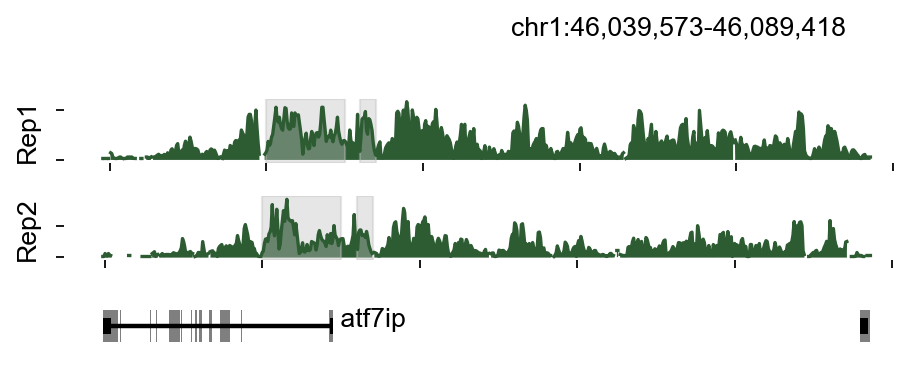

In [32]:
bw_obj.plot_track(chrom='chr1',chromstart=46039573,chromend=46089418,
                  plot_names=['Rep1','Rep2'],figwidth=6,figheight=0.8,
                  color_dict=color_dict,
                  region_dict=region_dict)


## Plot Matrix

### Compute the tss/tes enrichment matrix

Different genes have inconsistent chromatin activity in Chip-seq/ATAC-seq, as evidenced by differences in chromatin signaling before and after the TSS/TES locus, and we can find sample-specific TSS/TES signaling for downstream analysis. Here, we provide the function of `compute_matrix` to get the tss/tes enrichment matrix

In [5]:
bw_obj.compute_matrix('oocyte_H3K4me1_rep1',nbins=100)

......Computing oocyte_H3K4me1_rep1 matrix


Processing genes: 100%|█████████████████| 15247/15247 [04:21<00:00, 58.24gene/s]


......oocyte_H3K4me1_rep1 matrix finished
......oocyte_H3K4me1_rep1 tss matrix can be found in bw_tss_scores_dict[oocyte_H3K4me1_rep1]
......oocyte_H3K4me1_rep1 tes matrix can be found in bw_tes_scores_dict[oocyte_H3K4me1_rep1]
......oocyte_H3K4me1_rep1 body matrix can be found in bw_body_scores_dict[oocyte_H3K4me1_rep1]


The tss result will be stored in `bw_tss_scores_dict['oocyte_H3K4me1_rep1']`, and tes stored in `bw_tes_scores_dict['oocyte_H3K4me1_rep1']`. The obs represent the genes 

In [6]:
bw_obj.bw_tss_scores_dict['oocyte_H3K4me1_rep1']

AnnData object with n_obs × n_vars = 15247 × 100
    uns: 'range', 'bins'

After compute the tss/tes enrichment matrix, we can use `save/load` to save/load the result.

In [7]:
bw_obj.save_bw_result('data/bw_tutorial')

Saving oocyte_H3K4me1_rep1 results...


In [5]:
bw_obj.load_bw_result('data/bw_tutorial')

Loading oocyte_H3K4me1_rep1 results...
Loading oocyte_H3K4me1_rep2 results...
You need to run the compute_matrix function first for oocyte_H3K4me1_rep2!
You need to run the compute_matrix function first for oocyte_H3K4me1_rep2!
You need to run the compute_matrix function first for oocyte_H3K4me1_rep2!


### Plot the tss/tes enrichment matrix

Here, we provide `plot_matrix` and `plot_matrix_line` to visualize the signal of tss/tes enrichment

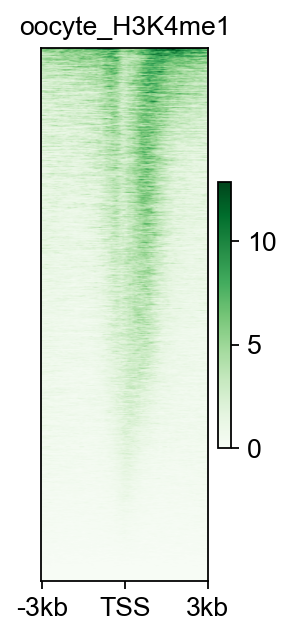

In [6]:
fig,ax=bw_obj.plot_matrix(bw_name='oocyte_H3K4me1_rep1',bw_type='TSS',
                    figsize=(2,4),cmap='Greens',
                    vmax='auto',vmin='auto',
                   fontsize=12,title='oocyte_H3K4me1')
fig.savefig('data/oocyte_H3K4me1_rep1.png',dpi=300,bbox_inches='tight')

(<Figure size 240x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'oocyte_H3K4me1_rep1'}>)

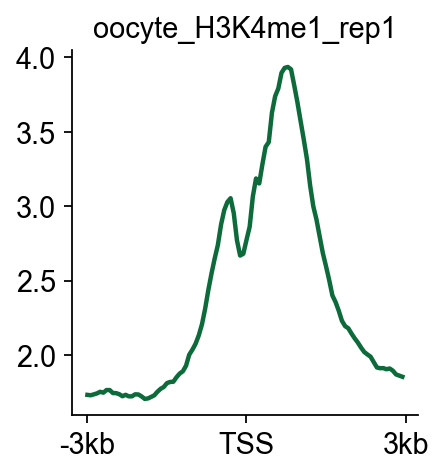

In [7]:
bw_obj.plot_matrix_line(bw_name='oocyte_H3K4me1_rep1',bw_type='TSS',
                    figsize=(3,3),color='#0d6a3b')

(<Figure size 160x320 with 2 Axes>,
 <AxesSubplot: title={'center': 'oocyte_H3K4me1'}>)

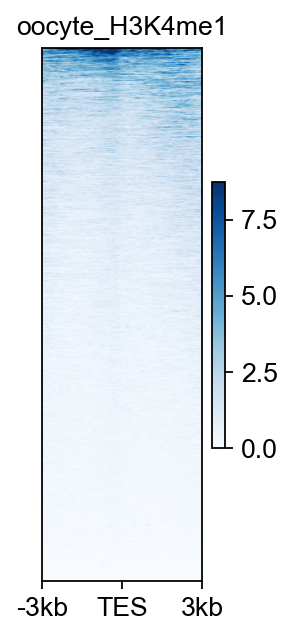

In [8]:
bw_obj.plot_matrix(bw_name='oocyte_H3K4me1_rep1',bw_type='TES',
                    figsize=(2,4),cmap='Blues',
                    vmax='auto',vmin='auto',
                   fontsize=12,title='oocyte_H3K4me1')

(<Figure size 240x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'oocyte_H3K4me1_rep1'}>)

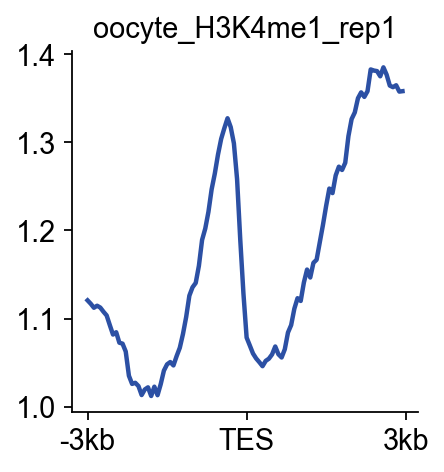

In [9]:
bw_obj.plot_matrix_line(bw_name='oocyte_H3K4me1_rep1',bw_type='TES',
                    figsize=(3,3),color='#2c50a4')

(<Figure size 200x320 with 2 Axes>,
 <AxesSubplot: title={'center': 'oocyte_H3K4me1'}>)

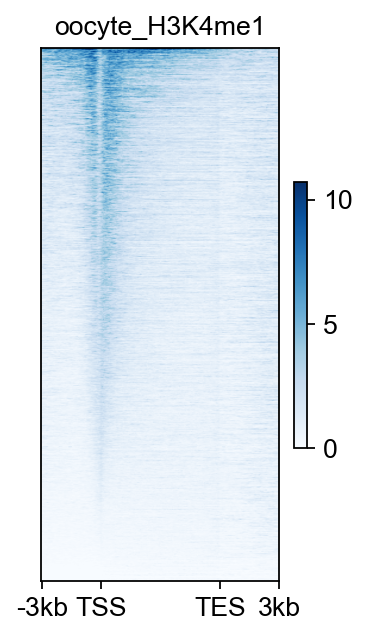

In [15]:
bw_obj.plot_matrix(bw_name='oocyte_H3K4me1_rep1',bw_type='all',
                    figsize=(2.5,4),cmap='Blues',
                    vmax='auto',vmin='auto',
                   fontsize=12,title='oocyte_H3K4me1')

(<Figure size 240x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'oocyte_H3K4me1_rep1'}>)

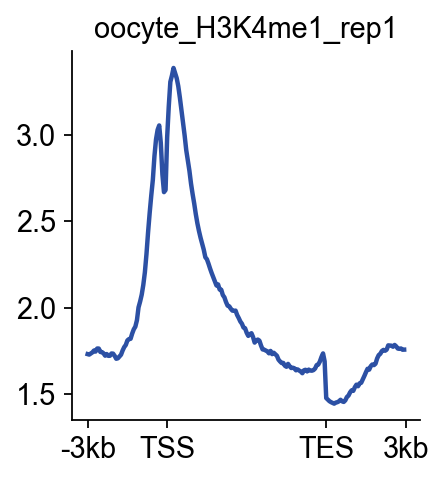

In [16]:
bw_obj.plot_matrix_line(bw_name='oocyte_H3K4me1_rep1',bw_type='all',
                    figsize=(3,3),color='#2c50a4')

## Plot the correlation between bigwig

In addition to exploring the properties of the bigwig itself, sometimes we need to calculate the correlation between different bigwigs.

We set the size of each bin to 10000, i.e., the size of the region on the chromosome, and calculate the average chromosome signal value for each bin. and store it in the `scoreperbindata`

In [ ]:
scoreperbindata=bw_obj.getscoreperbin(bin_size=10000,
                      number_thread=4,)

In [7]:
scoreperbindata.head()

,chrom,start,end,oocyte_H3K4me1_rep1,oocyte_H3K4me1_rep2
0,chr24,0,10000,1.075000,1.244246
1,chr24,10000,20000,1.860320,2.034103
2,chr24,20000,30000,1.771524,1.696709
3,chr24,30000,40000,1.186645,1.600000
4,chr24,40000,50000,2.283304,2.912770


We provide a nice visualization function to compare the correlation of two bigwigs, and for the purpose of visualization parameter tuning, we separate the value of the correlation from the visualization step to reduce the time spent repeating the computation when tuning the visualization parameters

In [5]:
bw_obj.compute_correlation(bw_names=['oocyte_H3K4me1_rep1','oocyte_H3K4me1_rep2'])

The correlation between oocyte_H3K4me1_rep1 and oocyte_H3K4me1_rep2 is 0.93
Now you can use plot_correlation() to plot the correlation scatter plot


0.9309858878429175

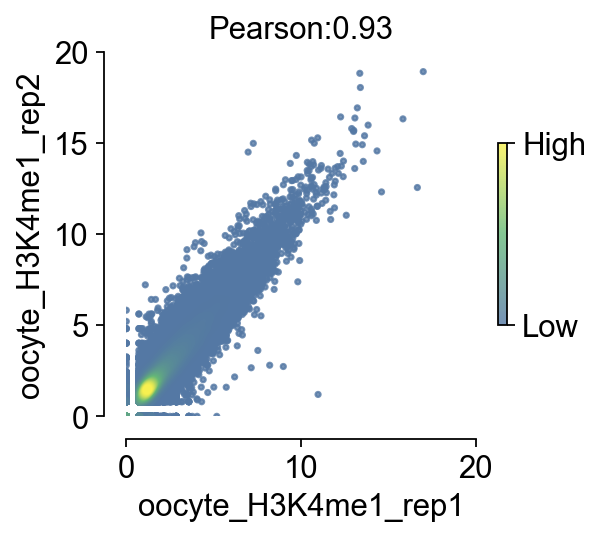

In [12]:
fig,ax=bw_obj.plot_correlation_bigwig(figsize=(3.5,3),
                                scatter_size=5,scatter_alpha=0.8,
                                fontsize=14)
fig.savefig('data/correlation_bigwig.png',dpi=300,bbox_inches='tight')